# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
uom = "imperial"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sulphur
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | dickinson
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | itoman
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | aleg
Processing Record 8 of Set 1 | chibougamau
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | usogorsk
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | hinton
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | fuglafjordur
Processing Record 23 of Set 1 | kapa'a
P

City not found. Skipping...
Processing Record 41 of Set 4 | talara
Processing Record 42 of Set 4 | wewak
Processing Record 43 of Set 4 | scottburgh
Processing Record 44 of Set 4 | brookings
Processing Record 45 of Set 4 | remire-montjoly
Processing Record 46 of Set 4 | utrik
Processing Record 47 of Set 4 | trinity beach
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | lompoc
Processing Record 0 of Set 5 | tura
Processing Record 1 of Set 5 | castillos
Processing Record 2 of Set 5 | bubaque
Processing Record 3 of Set 5 | filadelfia
Processing Record 4 of Set 5 | palmer
Processing Record 5 of Set 5 | oamaru
Processing Record 6 of Set 5 | nelson bay
Processing Record 7 of Set 5 | pechora
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | guiberoua
Processing Record 10 of Set 5 | thunder bay
Processing Record 11 of Set 5 | savave village
City not found. Skipping...
Processing Record 12 of Set 5 | sinop
Processing Record 13 of Set 5 | balqash
Proces

Processing Record 30 of Set 8 | bardai
Processing Record 31 of Set 8 | madang
Processing Record 32 of Set 8 | parauapebas
Processing Record 33 of Set 8 | pont rouge
Processing Record 34 of Set 8 | linhares
Processing Record 35 of Set 8 | montbard
Processing Record 36 of Set 8 | gargalianoi
Processing Record 37 of Set 8 | darwin
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | lovech
Processing Record 41 of Set 8 | sanya
Processing Record 42 of Set 8 | mabamba
Processing Record 43 of Set 8 | keflavik
Processing Record 44 of Set 8 | malango
Processing Record 45 of Set 8 | imbituba
Processing Record 46 of Set 8 | nogliki
Processing Record 47 of Set 8 | kabompo
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | greymouth
Processing Record 0 of Set 9 | terrace
Processing Record 1 of Set 9 | biltine
Processing Record 2 of Set 9 | winkler
Processing Record 3 of Set 9 | jiuquan
Processing Record 4 of Set 

Processing Record 20 of Set 12 | maluso
Processing Record 21 of Set 12 | borjomi
Processing Record 22 of Set 12 | yaren
Processing Record 23 of Set 12 | daru
Processing Record 24 of Set 12 | hadibu
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sulphur,30.2366,-93.3774,66.18,80,75,12.66,US,1711157199
1,enewetak,11.3474,162.3373,81.97,78,0,12.82,MH,1711157199
2,dickinson,29.4608,-95.0513,69.04,71,75,14.00,US,1711157255
3,waitangi,-43.9535,-176.5597,59.83,83,100,4.00,NZ,1711157385
4,itoman,26.1247,127.6694,73.78,70,75,20.71,JP,1711157385


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sulphur,30.2366,-93.3774,66.18,80,75,12.66,US,1711157199
1,enewetak,11.3474,162.3373,81.97,78,0,12.82,MH,1711157199
2,dickinson,29.4608,-95.0513,69.04,71,75,14.00,US,1711157255
3,waitangi,-43.9535,-176.5597,59.83,83,100,4.00,NZ,1711157385
4,itoman,26.1247,127.6694,73.78,70,75,20.71,JP,1711157385


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [23]:
x= city_data_df["Lat"]
y= city_data_df["Max Temp"]

In [22]:
def create_graphs(x_vals, y_vals, fig_name):

    # Build scatter plot for latitude vs. temperature
    plt.scatter(x_vals, y_vals,edgecolor="black")

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (c)")
    plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")
    plt.grid(True)
    # Save the figure
    plt.savefig(f"output_data/{fig_name}.png")

    # Show plot
    plt.show()

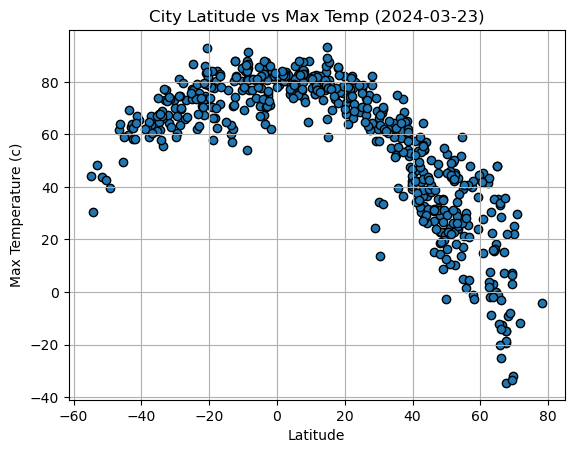

In [24]:
create_graphs(x,y, "Fig1")

#### Latitude Vs. Humidity

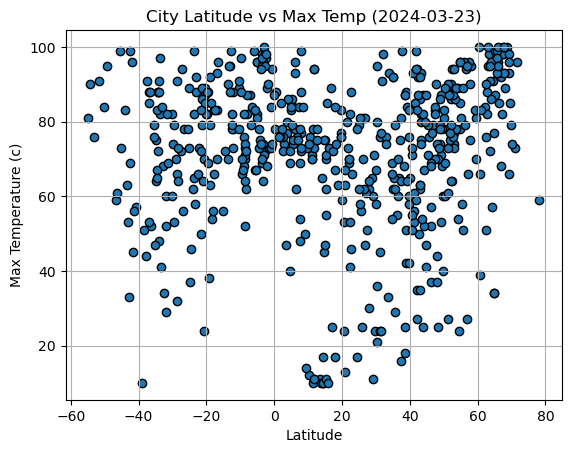

In [25]:
create_graphs(x,city_data_df["Humidity"], "Fig2")

#### Latitude Vs. Cloudiness

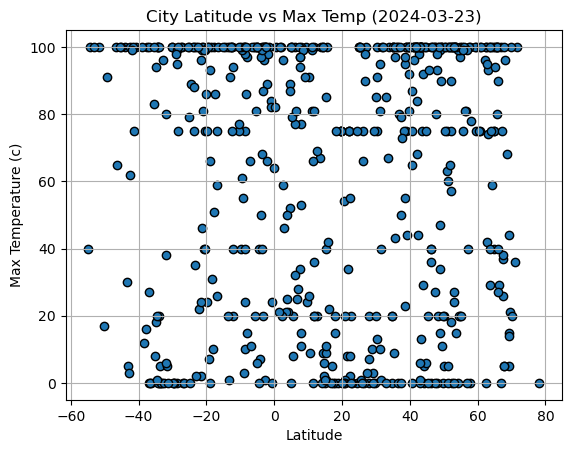

In [26]:
create_graphs(x,city_data_df["Cloudiness"], "Fig3")

#### Latitude vs. Wind Speed Plot

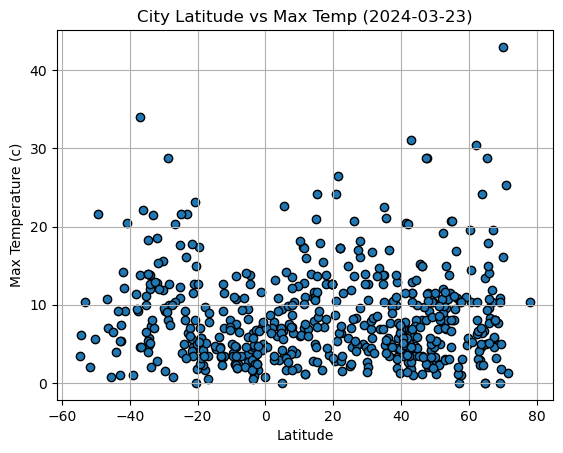

In [27]:
create_graphs(x,city_data_df["Wind Speed"], "Fig4")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sulphur,30.2366,-93.3774,66.18,80,75,12.66,US,1711157199
1,enewetak,11.3474,162.3373,81.97,78,0,12.82,MH,1711157199
2,dickinson,29.4608,-95.0513,69.04,71,75,14.00,US,1711157255
4,itoman,26.1247,127.6694,73.78,70,75,20.71,JP,1711157385
5,anadyr,64.7500,177.4833,0.10,77,40,13.42,RU,1711157200


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,59.83,83,100,4.00,NZ,1711157385
8,adamstown,-25.0660,-130.1015,77.50,73,79,10.87,PN,1711157201
9,afaahiti,-17.7500,-149.2833,84.07,66,51,1.61,PF,1711157201
12,port-aux-francais,-49.3500,70.2167,39.45,95,91,21.61,TF,1711157202
23,grytviken,-54.2811,-36.5092,30.60,90,100,6.13,GS,1711157209


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8754042519700995


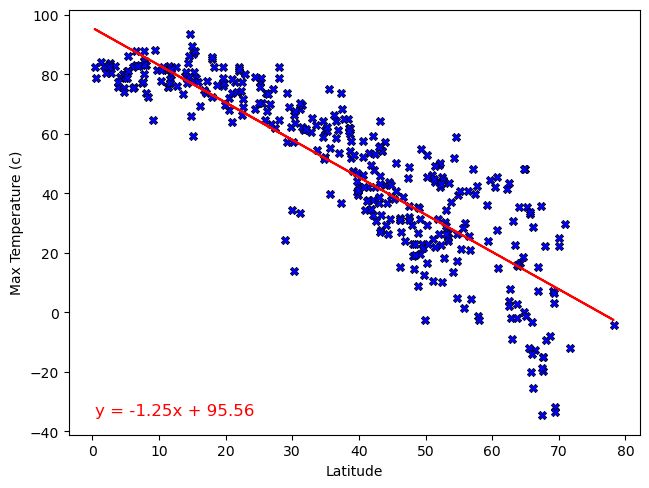

In [32]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.6800732457600497


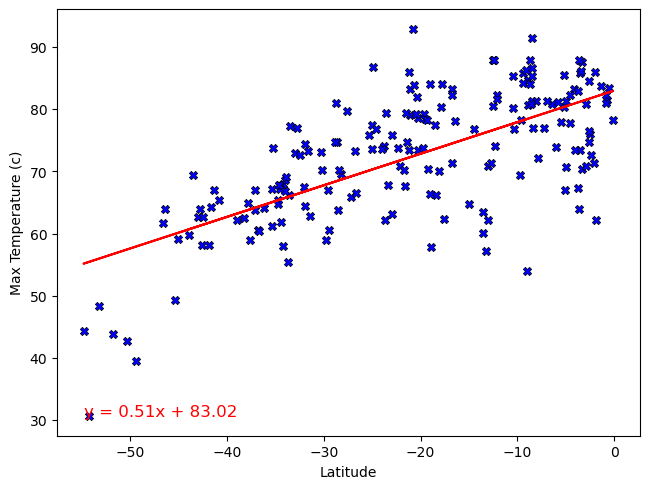

In [33]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2860421879938371


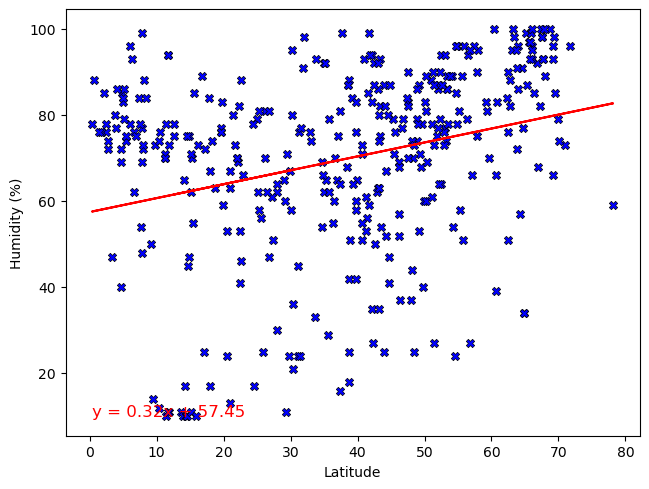

In [34]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.260299937805273


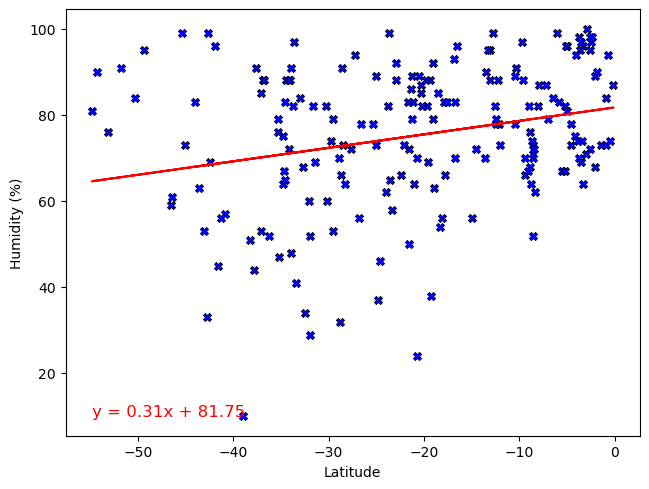

In [35]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13562118230956918


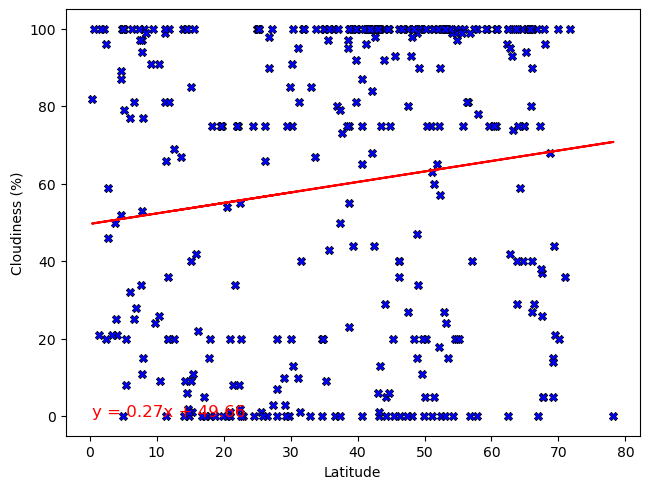

In [36]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.11828426250393179


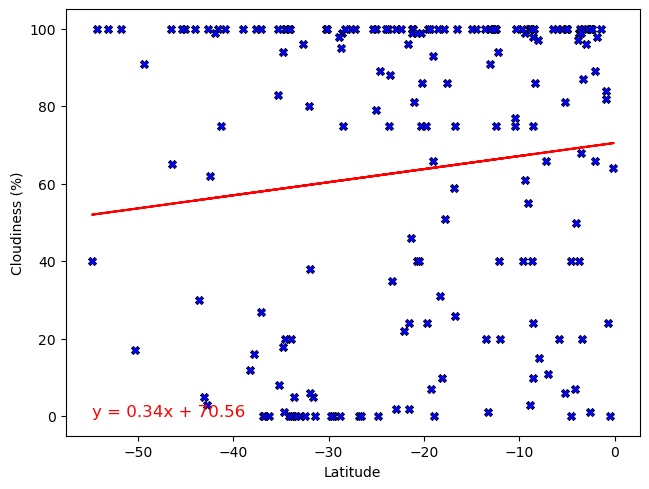

In [37]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.027967362689120544


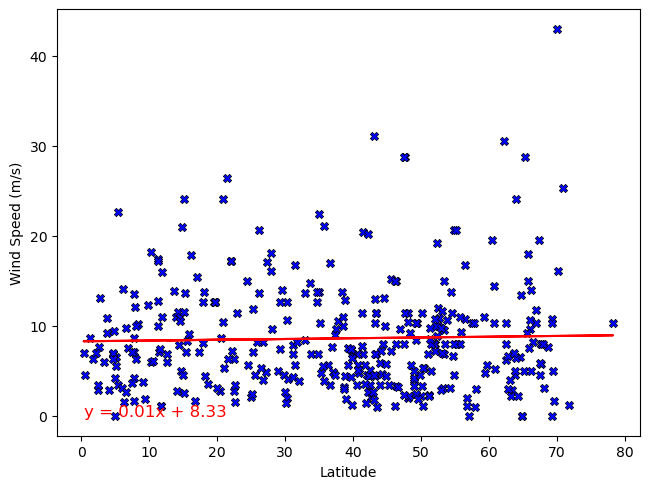

In [38]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.31257210948978686


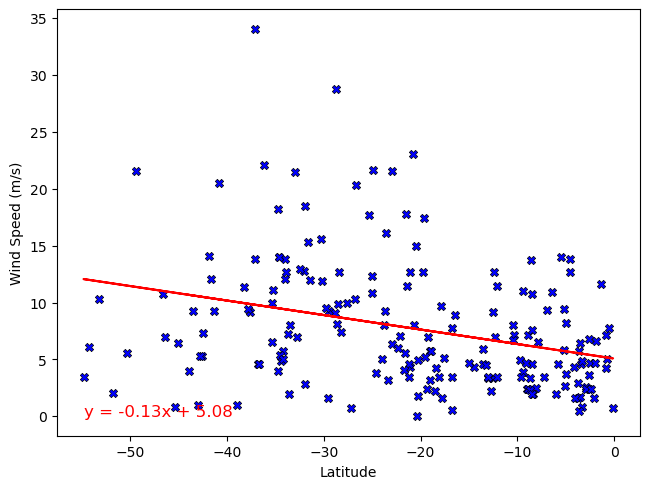

In [39]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE